Importing necessary packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


reading tiktok reviews data from google play stores

In [2]:
datafile = pd.read_csv("tiktok_google_play_reviews.csv")

print(datafile.head())

<ipython-input-2-d61accd8d264>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  datafile = pd.read_csv("tiktok_google_play_reviews.csv")


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

Fetching only the required columns and eliminating other columns

In [3]:
datafile = datafile[["content", "score"]]
print(datafile.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


checking for null values in the data

In [4]:
print(datafile.isnull().sum())

content    16
score       0
dtype: int64


removing null columns from data

In [5]:
datafile = datafile.dropna()

cleaning the data

In [6]:
stopword=set(stopwords.words('english'))
def cleanthedata(textdata):
  textdata = str(textdata).lower()
  textdata = re.sub('\[.*?\]', '', textdata)
  textdata = re.sub('https?://\S+|www\.\S+', '', textdata)
  textdata = re.sub('<.*?>+', '', textdata)
  textdata = re.sub('[%s]' % re.escape(string.punctuation), '', textdata)
  textdata = re.sub('\n', '', textdata)
  textdata = re.sub('\w*\d\w*', '', textdata)
  textdata = [word for word in textdata.split(' ') if word not in stopword]
  textdata=" ".join(textdata)
  textdata = [stemmer.stem(word) for word in textdata.split(' ')]
  textdata=" ".join(textdata)
  return textdata
datafile["content"] = datafile["content"].apply(cleanthedata)

checking for the total percentage of each rating ( that is total percentage of 1 star, 2 star , 3 star, 4 star and 5 star)

In [7]:
ratings = datafile["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

figure = px.pie(datafile,
                values=quantity,
                names=numbers,hole = 0.5)
figure.show()

building wordcloud to see the frequent words

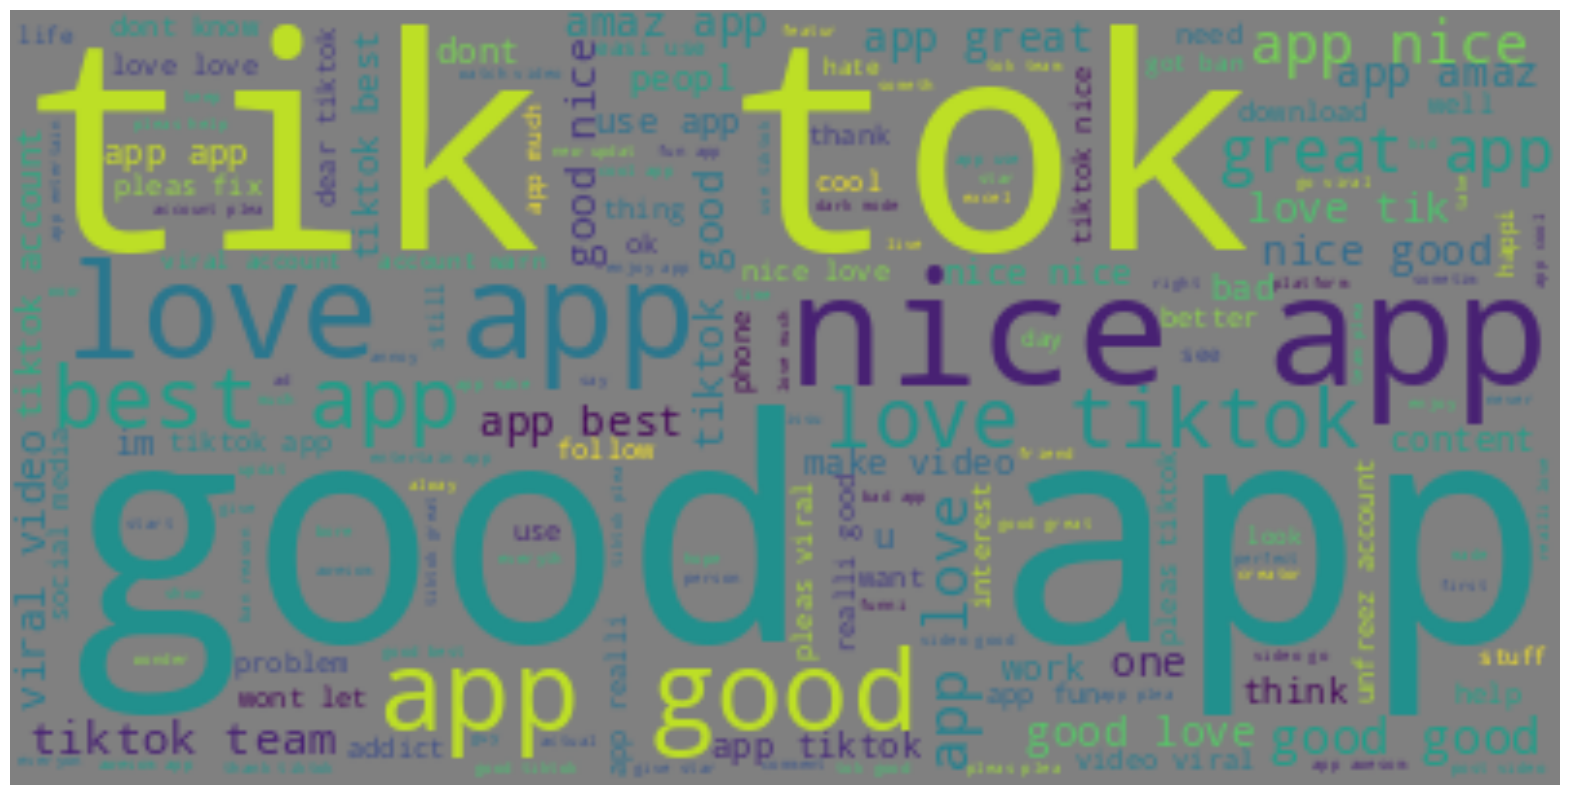

In [8]:
textdata = " ".join(i for i in datafile.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="grey").generate(textdata)
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

finding out the polarity of the text which is positive, negative or neutral

In [9]:
def classifysentiment(review):

    s = SentimentIntensityAnalyzer()
    sentiment = s.polarity_scores(review)

    if sentiment['compound'] > 0:
        return 'positive'
    elif sentiment['compound'] < 0:
        return 'negative'
    else:
        return 'neutral'

In [10]:
datafile.head()

,content,score
0,word,5
1,great fun app far,5
2,app would get higher rate liter cant sign seco...,1
3,wish could give percent rate love 💕 😘,5
4,pictur record,5


In [11]:
datafile = datafile.rename(columns={'content': 'stars'})

In [13]:
datafile['sentiment'] = datafile['stars'].apply(classifysentiment)

In [14]:
X = datafile['stars']
y = datafile['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#assigning 20% of the data for testing


**Multinomial Naive Bayes**

In [15]:
c = CountVectorizer()
X_train_vect = c.fit_transform(X_train)#vectorixing the test data in X_train

classifier = MultinomialNB()

classifier.fit(X_train_vect, y_train)#fitting the classifier with train data

MultinomialNB()

In [16]:
X_test_vect = c.transform(X_test)#using transform method to vectorize the text data in X_test
y_pred = classifier.predict(X_test_vect)#using the predict method to determine the type of sentiment

Calculating the accuracy of the model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


checking the type of sentiment for a random review

In [18]:
newreview = ["This app is really awesome and I enjoy using it."]
newreviewvect = c.transform(newreview)
sentimentpredicition = classifier.predict(newreviewvect)
print(sentimentpredicition)

['positive']


predicitng the probability of determined sentiment

In [19]:
sentimentprobability = classifier.predict_proba(newreviewvect)
print(sentimentprobability)

[[2.79332669e-05 2.29305193e-03 9.97679015e-01]]


Predicted % of Positive, Negative and Neutral Sentiments

In [20]:
sentimentcount = datafile['sentiment'].value_counts()
sentimentper = (sentimentcount / len(datafile['sentiment'])) * 100
print("Total % of positive sentiments: {:.2f}%".format(sentimentper[0]))
print("Total % of negative sentiments: {:.2f}%".format(sentimentper[1]))
print("Total % of neutral sentiments: {:.2f}%".format(sentimentper[2]))


Total % of positive sentiments: 59.05%
Total % of negative sentiments: 33.60%
Total % of neutral sentiments: 7.35%


Plotting the graph of predicted positive, negative and neutral comments

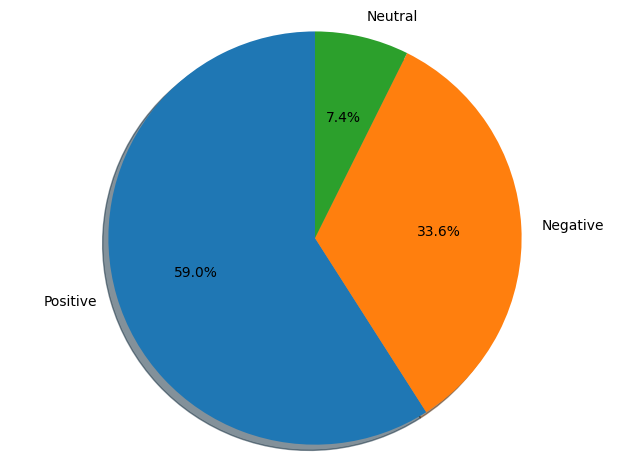

In [21]:
sentimentcount = datafile['sentiment'].value_counts()
sentiment_percentage = (sentimentcount / len(datafile['sentiment'])) * 100
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_percentage[0], sentiment_percentage[1], sentiment_percentage[2]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [22]:
y_pred = classifier.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.29%


Printing the classification report

In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.65      0.66      0.66      6762
     neutral       0.98      0.51      0.67     31012
    positive       0.76      0.97      0.85     54281

    accuracy                           0.79     92055
   macro avg       0.80      0.71      0.73     92055
weighted avg       0.83      0.79      0.78     92055



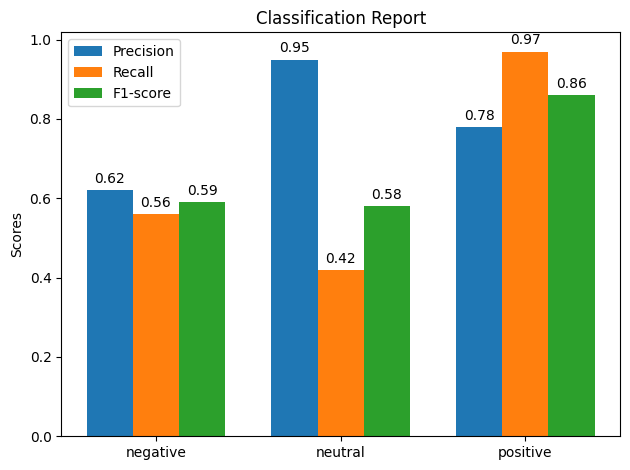

In [28]:
labels = ['negative', 'neutral', 'positive']
precision = [0.62, 0.95, 0.78]
recall = [0.56, 0.42, 0.97]
f1_score = [0.59, 0.58, 0.86]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()